In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.manifold import TSNE
from sklearn.neighbors import kneighbors_graph


from sklearn.cluster import AgglomerativeClustering as Agg

In [2]:
#using sklearn functions make_circles, make_moons and make_blobs to create datasets with 1000 samples each

n_samples = 1000

circles = datasets.make_circles(shuffle = True, n_samples=n_samples, factor=0.3 , noise=0.05)
moons = datasets.make_moons(shuffle = True, n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(centers= 5, n_samples=n_samples)
#all datasets will be visualized

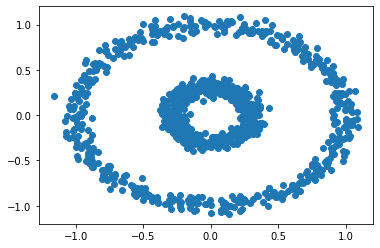

In [3]:
plt.scatter(circles[0][:,0],circles[0][:,1])

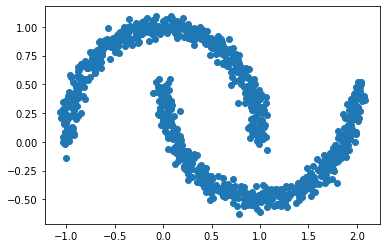

In [4]:
plt.scatter(moons[0][:,0], moons[0][:,1])

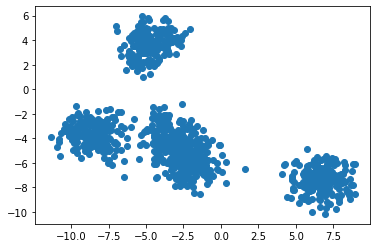

In [5]:
plt.scatter(blobs[0][:,0],blobs[0][:,1])

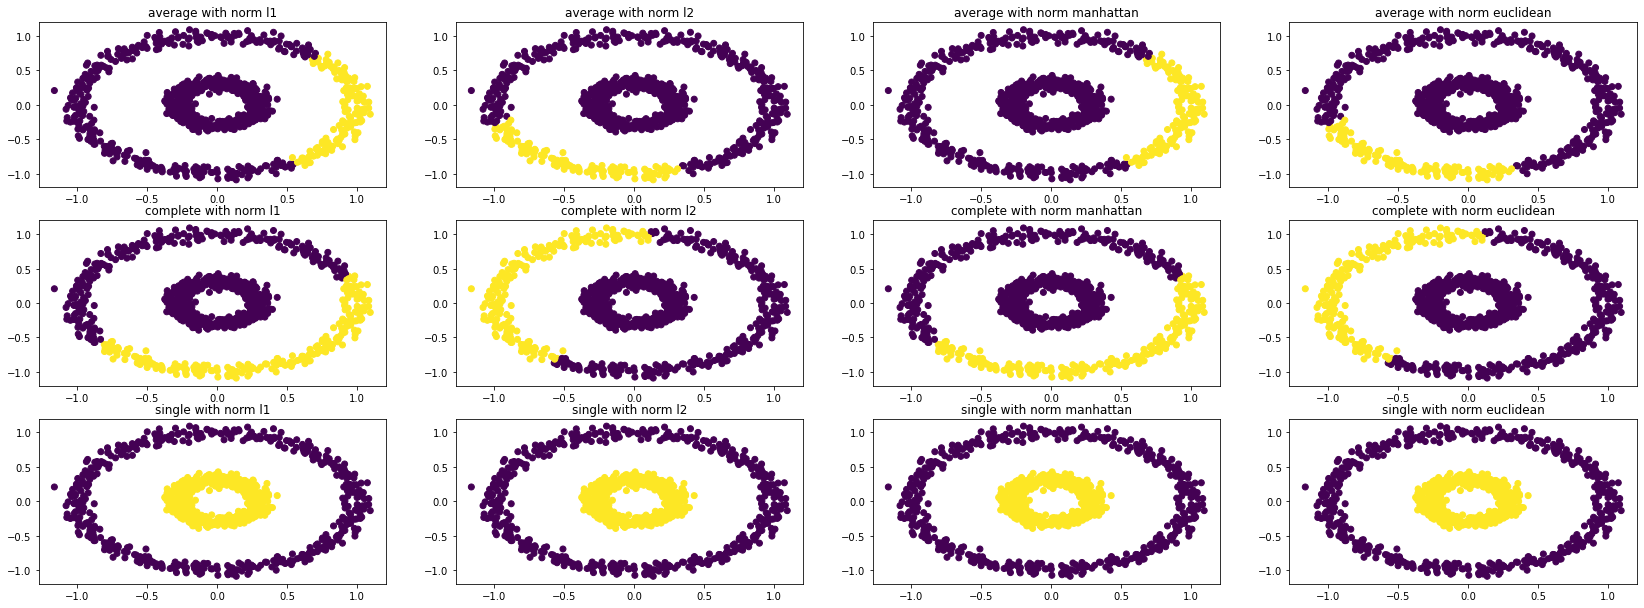

In [6]:
#combining different combinations of norms and linkages for the dataset circles and plot the results

fig, axs = plt.subplots(3, 4)
for i, linkage in enumerate(('average', 'complete', 'single')):
    for j, norm in enumerate(('l1', 'l2', 'manhattan', 'euclidean')):
        
        # AgglomerativeClustering
        model1 = Agg(linkage=linkage, affinity = norm)
        model1.fit(circles[0])
        
        axs[i,j].scatter(circles[0][:, 0], circles[0][:, 1], c=model1.labels_)
        axs[i,j].set_title(linkage + ' with norm ' + norm)

plt.subplots_adjust(bottom=0.05, top=2, wspace=0.2, left=0.3, right=4)
plt.show()


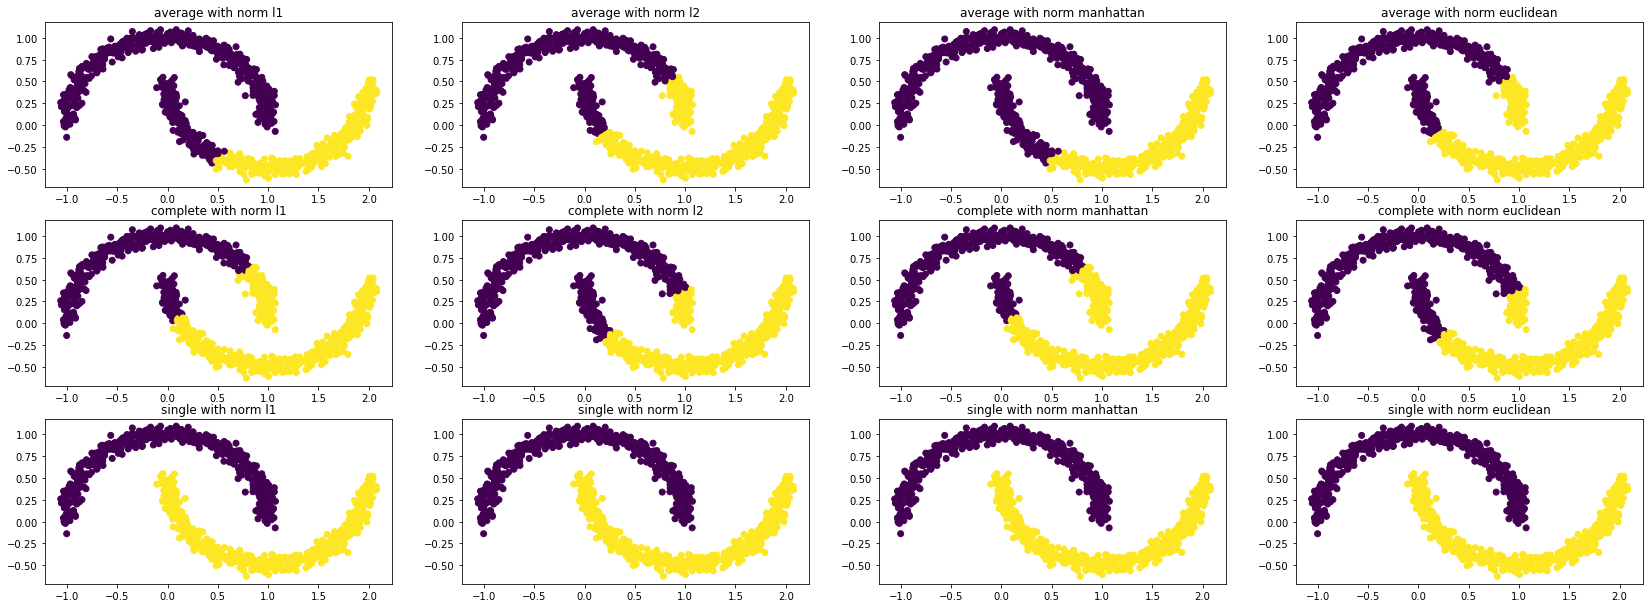

In [7]:
#combining different combinations of norms and linkages for the dataset moons and plot the results

fig, axs = plt.subplots(3, 4)
for i, linkage in enumerate(('average', 'complete', 'single')):
    for j, norm in enumerate(('l1', 'l2', 'manhattan', 'euclidean')):
        
        model1 = Agg(linkage=linkage, affinity = norm)
        model1.fit(moons[0])
        
        axs[i,j].scatter(moons[0][:, 0], moons[0][:, 1], c=model1.labels_)
        axs[i,j].set_title(linkage + ' with norm ' + norm)
     
plt.subplots_adjust(bottom=0.05, top=2, wspace=0.2, left=0.3, right=4)
plt.show()

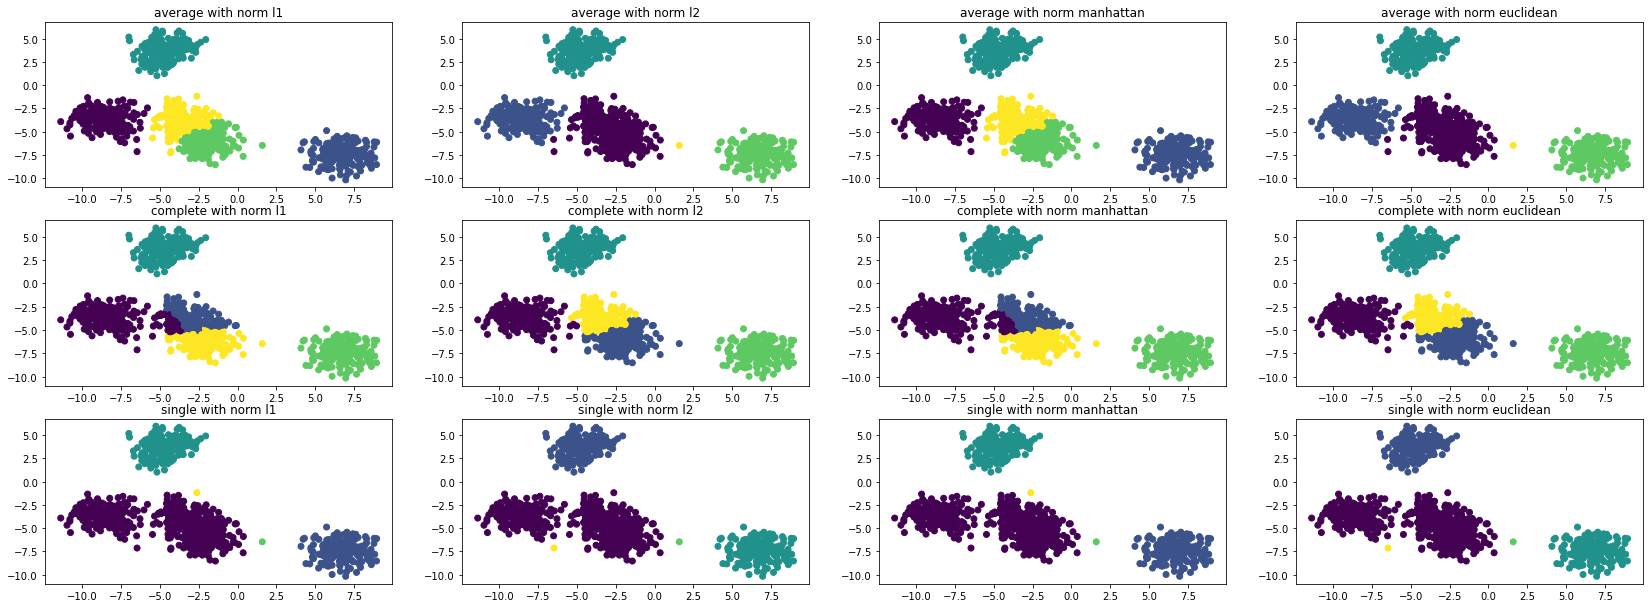

In [8]:
#combining different combinations of norms and linkages for the dataset blobs and plot the results

fig, axs = plt.subplots(3, 4)
for i, linkage in enumerate(('average', 'complete', 'single')):
    for j, norm in enumerate(('l1', 'l2', 'manhattan', 'euclidean')):
        
        model1 = Agg(linkage=linkage,n_clusters = 5, affinity = norm)
        model1.fit(blobs[0])
        
        axs[i,j].scatter(blobs[0][:, 0], blobs[0][:, 1], c=model1.labels_)
        axs[i,j].set_title(linkage + ' with norm ' + norm)
        
plt.subplots_adjust(bottom=0.05, top=2, wspace=0.2, left=0.3, right=4)
plt.show()

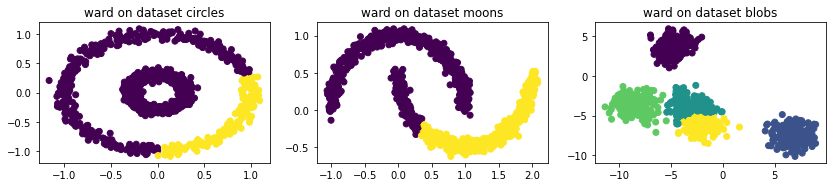

In [9]:
#linkage "ward" only works with eucledean norm. Plot the results for all 3 datasets:
plt.figure(figsize=(4, 1))    
for it in [[1, circles ,'circles', 2], [2, moons, 'moons', 2] ,[ 3, blobs, 'blobs', 5]]:
        plt.subplot(1 , 4, it[0])
        model3 = Agg(linkage='ward', n_clusters = it[3])
        model3.fit(it[1][0])
        plt.scatter(it[1][0][:, 0], it[1][0][:, 1], c=model3.labels_)
        plt.title("ward on dataset " + it[2])
        
plt.subplots_adjust(bottom=0.05, top=2, wspace=0.2, left=0.3, right=4)
plt.show()

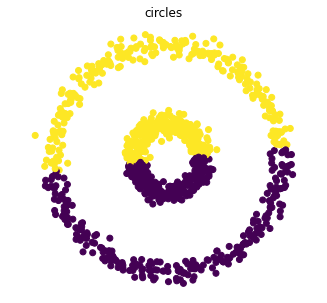

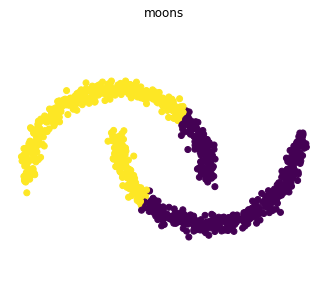

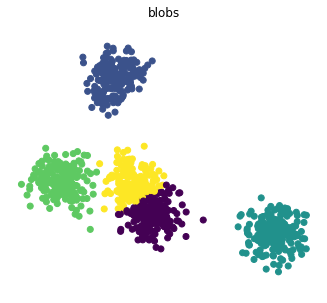

In [10]:
#Testing Kmeans clustering on all 3 datasets
for it in [[1, circles ,'circles'], [2, moons, 'moons'] ,[ 3,  blobs, 'blobs']]:

        plt.figure(figsize=(4, 4))
        plt.subplot(1 , 3, it[0])
      
        if it[2]=='blobs':
            num = 5
        else:
            num = 2
            
        model4 = cluster.KMeans(n_clusters=num).fit_predict(it[1][0])
        plt.scatter(it[1][0][:, 0], it[1][0][:, 1], c=model4)
        plt.title(it[2])
        plt.axis('equal')
        plt.axis('off')
        plt.subplots_adjust(bottom=0.05, top=1, wspace=0.2, left=0.3, right=4)
        

plt.show()


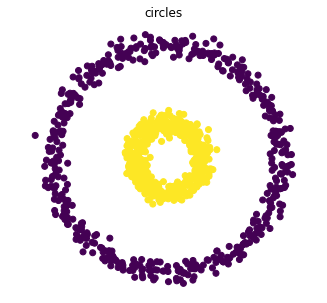

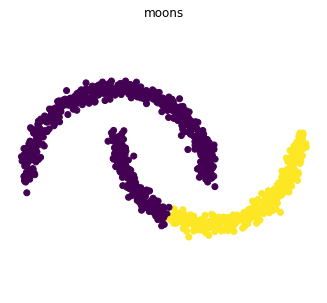

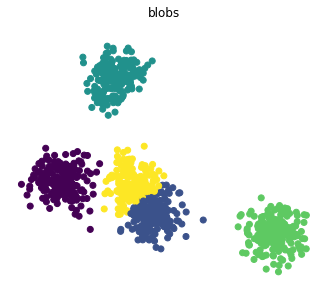

In [11]:
#combination of tSNE and Kmeans
for it in [[1, circles,'circles'], [2, moons, 'moons'] ,[ 3,  blobs, 'blobs']]:

        plt.figure(figsize=(4, 4))
        plt.subplot(1 , 3, it[0])
        
        if it[2]=='blobs':
            num = 5
        else:
            num = 2
            
        tsne = TSNE(n_components=2,perplexity=40,n_iter=1000)
        Xtsne= tsne.fit_transform(it[1][0])
        model4 = cluster.KMeans(n_clusters=num).fit_predict(Xtsne)
        plt.scatter(it[1][0][:, 0], it[1][0][:, 1], c=model4)
        plt.title(it[2])
        plt.axis('equal')
        plt.axis('off')
        plt.subplots_adjust(bottom=0.05, top=1, wspace=0.2, left=0.3, right=4)


plt.show()